In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm

sns.set_style('whitegrid')

## Загрузка и обработка данных

In [2]:
# загрузка таблицы
data = pd.read_csv('data/dataset.zip', index_col=[0])
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# размерность таблицы
data.shape

(607, 11)

In [4]:
# очистка данных от дубликатов
print('Количество дубликатов -', data.duplicated().sum())
data = data.drop_duplicates()

Количество дубликатов - 42


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   salary_currency     565 non-null    object
 6   salary_in_usd       565 non-null    int64 
 7   employee_residence  565 non-null    object
 8   remote_ratio        565 non-null    int64 
 9   company_location    565 non-null    object
 10  company_size        565 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.0+ KB


In [6]:
# описательная статистика численных признаков
data.describe().round(2)

,work_year,salary,salary_in_usd,remote_ratio
count,565.00,565.00,565.00,565.00
mean,2021.36,338115.99,110610.34,69.91
std,0.70,1599878.79,72280.70,40.90
min,2020.00,4000.00,2859.00,0.00
25%,2021.00,67000.00,60757.00,50.00
50%,2021.00,110925.00,100000.00,100.00
75%,2022.00,165000.00,150000.00,100.00
max,2022.00,30400000.00,600000.00,100.00


In [7]:
# описательная статистика категориальных признаков
data.describe(include='O')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,565,565,565,565,565,565,565
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,243,546,130,359,295,318,290


In [8]:
# цикл по столбцам таблицы
for col in data.columns:
    # доля уникальных значений от размера признака
    nunique_ratio = data[col].nunique() / data[col].count()
    # наибольшая относительная частота в признаке
    top_freq = data[col].value_counts(normalize=True).max()
    if top_freq > 0.95:
        print(f'{col}: {round(top_freq * 100, 2)}% одинаковых значений')
    if nunique_ratio > 0.95:
        print(f'{col}: {round(nunique_ratio * 100, 2)}% уникальных значений')  

employment_type: 96.64% одинаковых значений


In [9]:
data = data.drop(['employment_type', 'salary', 'salary_currency'], axis=1)

Исходя из данных выше, можно сделать вывод, что в Соединенных Штатах расположено больше всего компаний и проживающих там сотрудников. В данных чаще всего встречается профессия "Data Scientist", она занимает одну четвертую часть от всех остальных профессий. Также можно отметить, что почти половина сотрудников работала в роли сеньоров или экспертов. Я решил избавиться от признака с типом трудоустройства, потому что почти все сотрудники работали полный рабочий день. В признаке зарплат имеется множество разных валют и из-за этого очень сильно искажается распределение, так как мы имеем признак с зарплатами в долларах, то я принял решение удалить столбец. Сюда же можно отнести код валюты, так как он после удаления столбца с зарплатами не информативен.

## Визуальный анализ данных

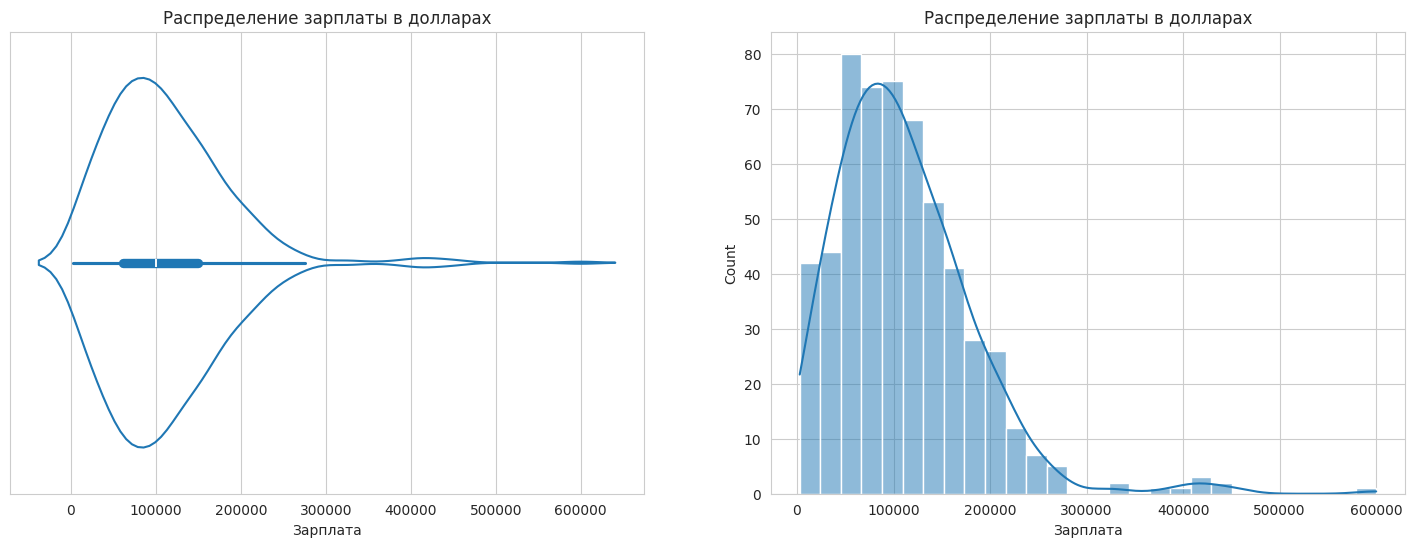

In [10]:
# построние диаграмм распределения для зарплаты в долларах
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.violinplot(data.salary_in_usd, fill=False, orient='h', inner='box', ax=ax[0]);
ax[0].set_title('Распределение зарплаты в долларах');
ax[0].set_xlabel('Зарплата');

sns.histplot(data.salary_in_usd, element='bars', kde=True, ax=ax[1])
ax[1].set_title('Распределение зарплаты в долларах')
ax[1].set_xlabel('Зарплата');

In [11]:
# вывод строк, где зарплата больше 300 тысяч
data[data['salary_in_usd'] > 300_000].sort_values('salary_in_usd', ascending=False)

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
252,2021,EX,Principal Data Engineer,600000,US,100,US,L
33,2020,MI,Research Scientist,450000,US,0,US,M
97,2021,MI,Financial Data Analyst,450000,US,100,US,L
157,2021,MI,Applied Machine Learning Scientist,423000,US,50,US,L
225,2021,EX,Principal Data Scientist,416000,US,100,US,S
63,2020,SE,Data Scientist,412000,US,100,US,L
523,2022,SE,Data Analytics Lead,405000,US,100,US,L
519,2022,SE,Applied Data Scientist,380000,US,100,US,L
25,2020,EX,Director of Data Science,325000,US,100,US,L
482,2022,EX,Data Engineer,324000,US,100,US,M


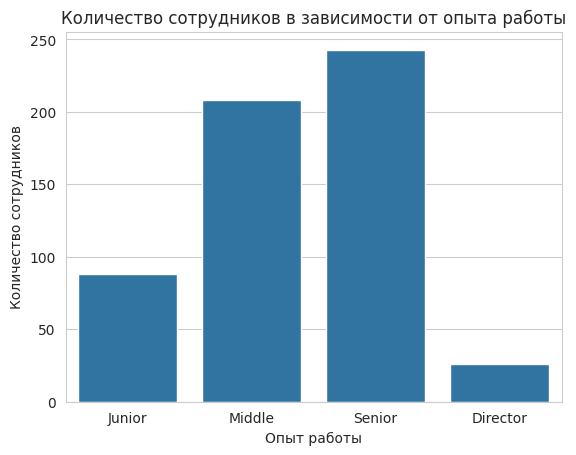

In [12]:
sns.countplot(data, x='experience_level', order=['EN', 'MI', 'SE', 'EX'])
# Замена меток на графике
new_labels = ['Junior', 'Middle', 'Senior', 'Director']
plt.xticks(range(len(new_labels)), new_labels)
# Название графика и замена названия оси x
plt.xlabel('Опыт работы')
plt.ylabel('Количество сотрудников')
plt.title('Количество сотрудников в зависимости от опыта работы')

plt.show()

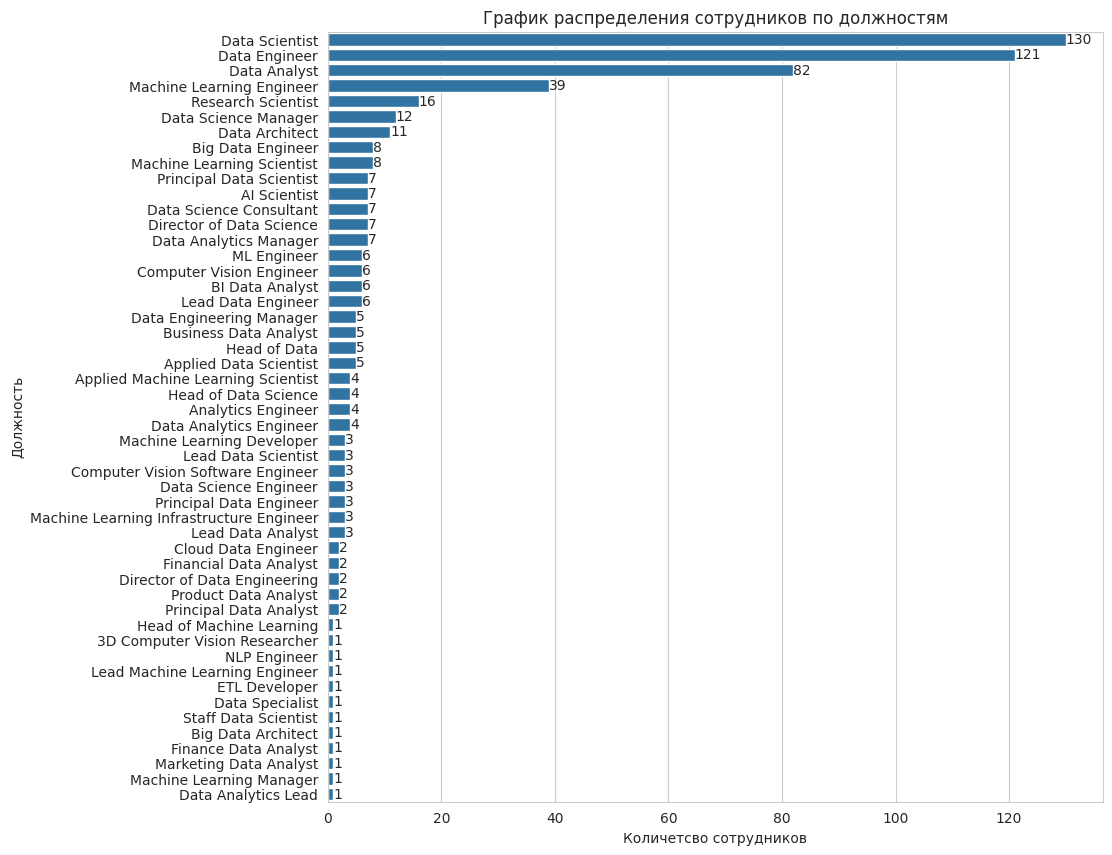

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
# создание отсортированного списка
job_title_list = data.job_title.value_counts().index.tolist()

sns.countplot(data.job_title, order=job_title_list, ax=ax)

ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title('График распределения сотрудников по должностям')
ax.set_ylabel('Должность')
ax.set_xlabel('Количетсво сотрудников');

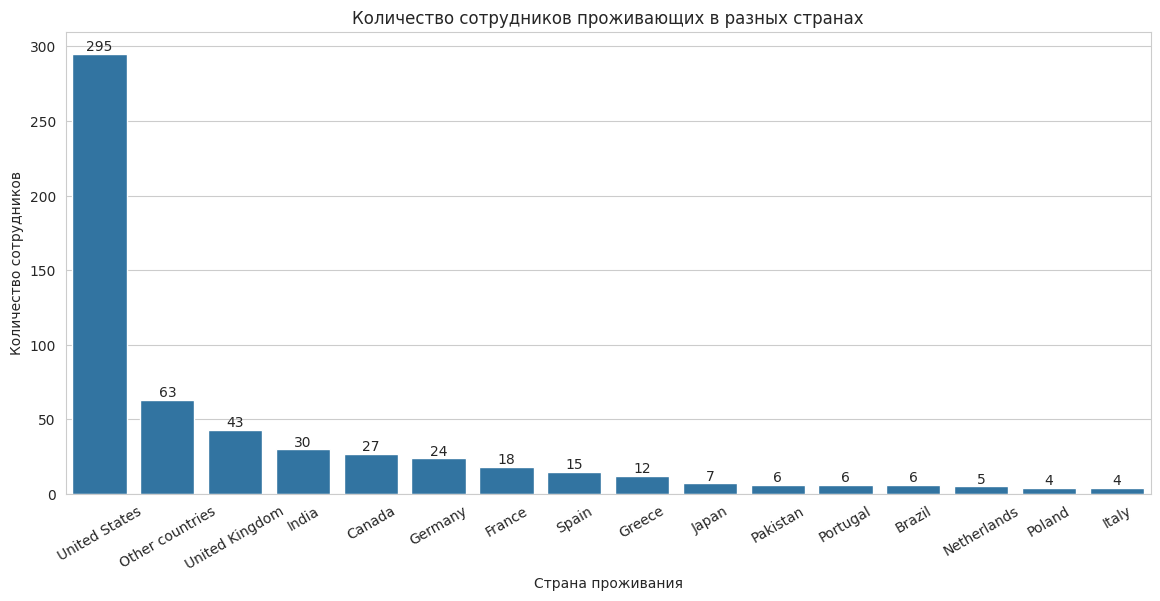

In [14]:
# создание списка с 15 странами, в которых проживают больше всего сотрудников
largest_residence = data.employee_residence.value_counts().nlargest(15).index.tolist()
# страны из списка оставляем как есть, а остальные страны помечаем как 'other'
residence_df = data.employee_residence.apply(lambda x: x if x in largest_residence else 'other')

fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(residence_df.value_counts(), ax=ax)
ax.set_title('Количество сотрудников проживающих в разных странах')
ax.set_xlabel('Страна проживания')
ax.set_ylabel('Количество сотрудников');
ax.bar_label(ax.containers[0], fontsize=10);
# замена кодов стран на их названия
new_labels = ['United States', 'Other countries', 'United Kingdom', 'India', 'Canada', 'Germany', 'France',\
               'Spain', 'Greece', 'Japan', 'Pakistan', 'Portugal', 'Brazil', 'Netherlands', 'Poland', 'Italy']
plt.xticks(range(len(new_labels)), new_labels, rotation=30)
plt.show()

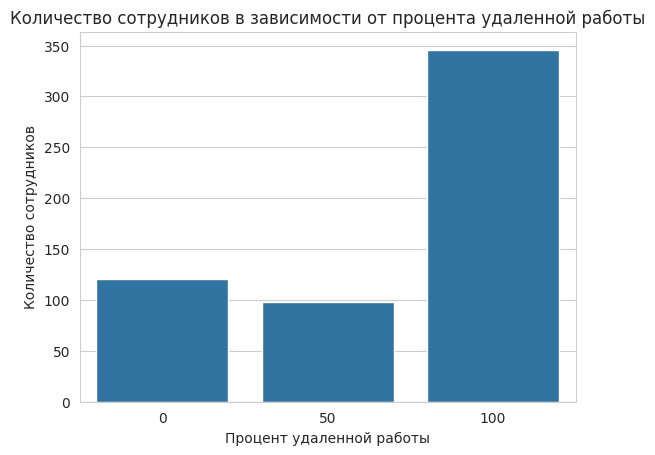

In [15]:
fig, ax = plt.subplots()
sns.countplot(data, x='remote_ratio')
ax.set_title('Количество сотрудников в зависимости от процента удаленной работы')
ax.set_xlabel('Процент удаленной работы')
ax.set_ylabel('Количество сотрудников');

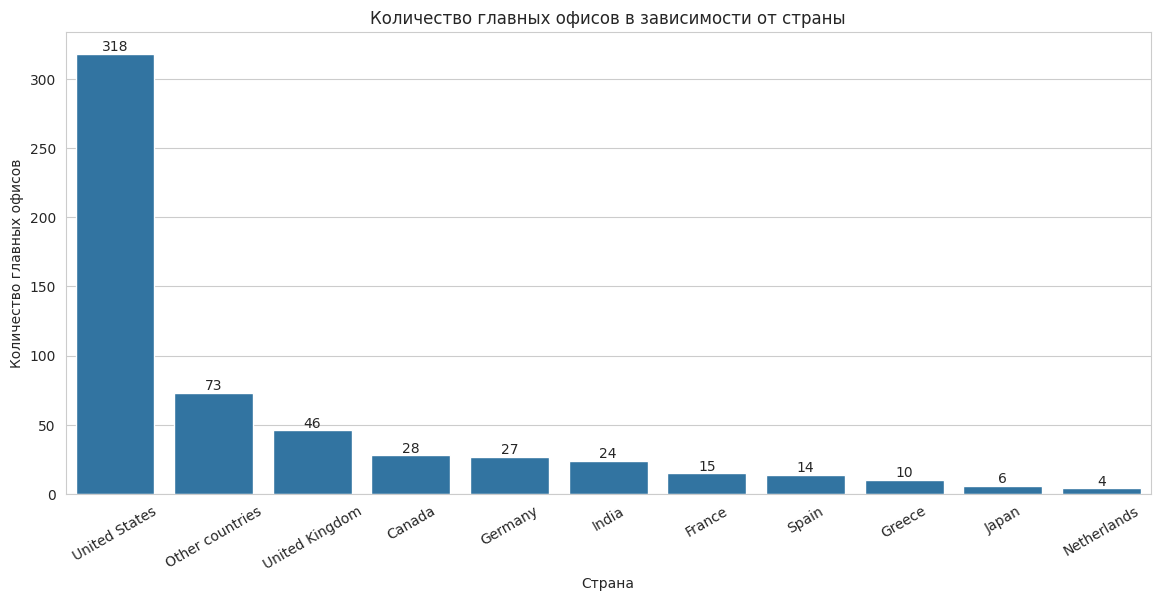

In [16]:
# создание списка с 10 странами, в которых больше всего расположено главных офисов
largest_countries = data.company_location.value_counts().nlargest(10).index.tolist()
# страны из списка оставляем как есть, а остальные страны помечаем как 'other'
df_company_location = data.company_location.apply(lambda x: x if x in largest_countries else 'other')

fig, ax = plt.subplots(figsize=(14, 6))

sns.barplot(df_company_location.value_counts(), ax=ax)
ax.set_title('Количество главных офисов в зависимости от страны')
ax.set_xlabel('Страна')
ax.set_ylabel('Количество главных офисов')
ax.bar_label(ax.containers[0], fontsize=10);
# замена кодов стран на их названия
new_labels = ['United States', 'Other countries', 'United Kingdom', 'Canada', 'Germany', 'India', 'France', 'Spain', 'Greece', 'Japan', 'Netherlands']
plt.xticks(range(len(new_labels)), new_labels, rotation=30)
plt.show()

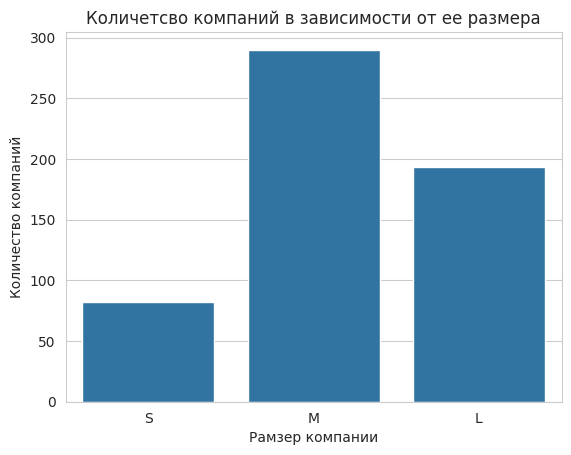

In [17]:
fig, ax = plt.subplots()
sns.countplot(data, x='company_size', order=['S', 'M', 'L'])

ax.set_xlabel('Рамзер компании')
ax.set_ylabel('Количество компаний')
ax.set_title('Количетсво компаний в зависимости от ее размера');

На графиках видно, что Соединенные Штаты отрываются вперед, по количеству проживающих там сотрудников и расположенных главных офисов, за США следует Великобритания. Больше половины сотрудников работают полностью удаленно, почти 100 сотрудников работают частично удаленно и чуть больше сотни работают из офиса. За 3 года сотрудники чаще всего работали в роли сеньоров и мидлов, джуниоров чуть меньше сотни, а директоров примерно 25. Самыми популярными профессиями оказались: 'Data Scientist', 'Data Engineer' и 'Data Analyst', они занимают больше половины объема от всех остальных профессий. Можно отметить, что остальные профессии не сильно отличаются от тех, что являются самыми популярными, просто многие из них более узконаправленны на решение какой либо задачи. Чаще всего сотрудники работают в средних компаниях по размеру, где насчитывается примерно от 50 до 250 сотрудников. А реже всего в маленьких компаниях, где сотрудников меньше 50. Распределение зарплаты не является нормальным. Большинство показателей находятся в диапазоне от 70 тысяч до 140 тысяч долларов. Медиана равняется 100 тысячам. Есть показатели свыше 300 тысяч, которые могут вызвать подозрения, но в основном там либо сеньоры, либо директоры, которые проживают в Соединенных Штатах. Поэтому я считаю, что такая зарплата реальна и не стоит удалять эти записи.

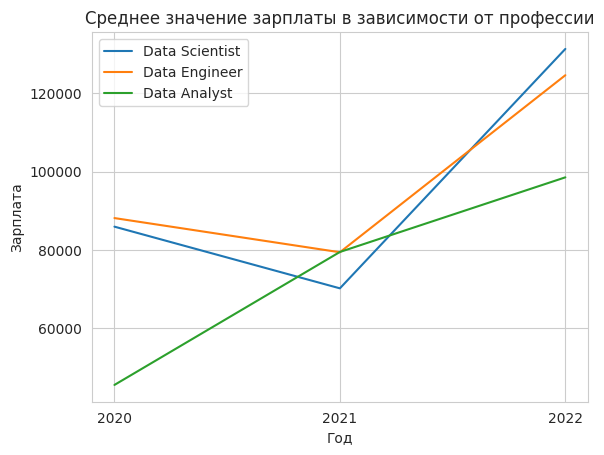

In [18]:
# создание сгрупированных значений для построения графика
data_scientist_grouped = data[data['job_title'] == 'Data Scientist'].groupby(['work_year'])['salary_in_usd'].mean()
data_engineer_grouped = data[data['job_title'] == 'Data Engineer'].groupby(['work_year'])['salary_in_usd'].mean()
data_analyst_grouped = data[data['job_title'] == 'Data Analyst'].groupby(['work_year'])['salary_in_usd'].mean()

fig, ax = plt.subplots()
sns.lineplot(data_scientist_grouped, label='Data Scientist')
sns.lineplot(data_engineer_grouped, label='Data Engineer')
sns.lineplot(data_analyst_grouped, label='Data Analyst')
ax.legend()

ax.set_title('Среднее значение зарплаты в зависимости от профессии')
ax.set_xlabel('Год')
ax.set_ylabel('Зарплата')

ax.set_xticks([2020, 2021, 2022])
plt.show()

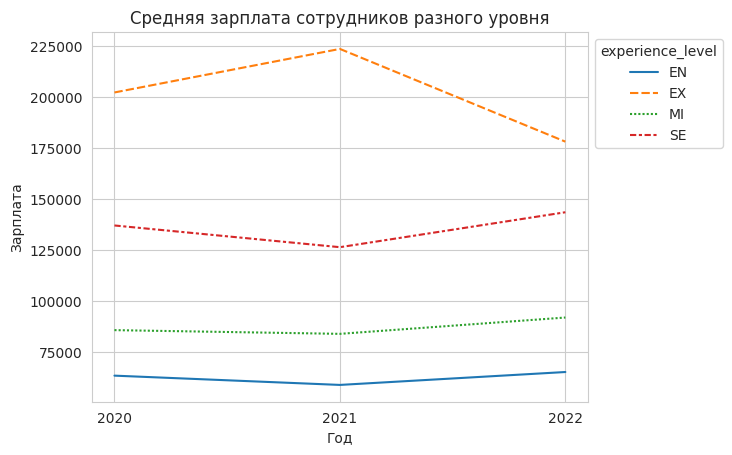

In [19]:
# построение сводной таблицы
levels_pivot = data.pivot_table(index='work_year', columns='experience_level', values='salary_in_usd')

fig, ax = plt.subplots()
sns.lineplot(levels_pivot)

ax.set_xlabel('Год')
ax.set_ylabel('Зарплата')
ax.set_title('Средняя зарплата сотрудников разного уровня')
# перемещение легенды в правый верхний угол
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.set_xticks([2020, 2021, 2022])
plt.show()

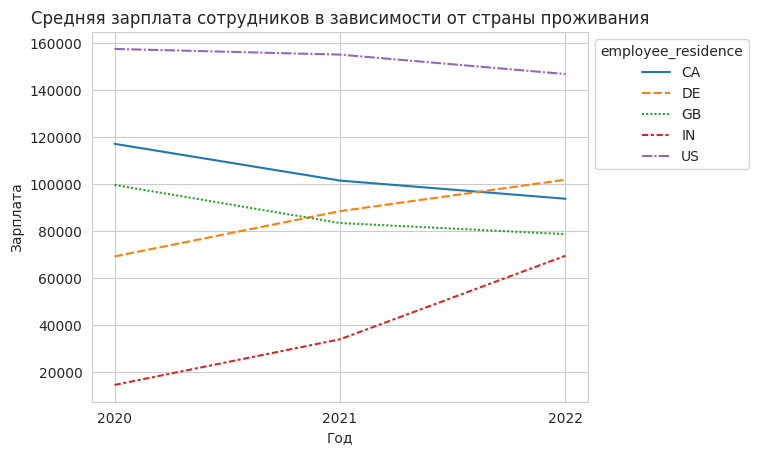

In [20]:
# построение сводной таблицы
residence_pivot = data.pivot_table(index='work_year', columns='employee_residence', values='salary_in_usd')
# создание списка
largest_residence = data.employee_residence.value_counts().nlargest(5).index.tolist()
for col in residence_pivot.columns:
    if col not in largest_residence:
        residence_pivot = residence_pivot.drop(col, axis=1)

fig, ax = plt.subplots()
sns.lineplot(residence_pivot)

ax.set_title('Средняя зарплата сотрудников в зависимости от страны проживания')
ax.set_xlabel('Год')
ax.set_ylabel('Зарплата')
# перемещение легенды в правый верхний угол
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.set_xticks([2020, 2021, 2022])
plt.show()

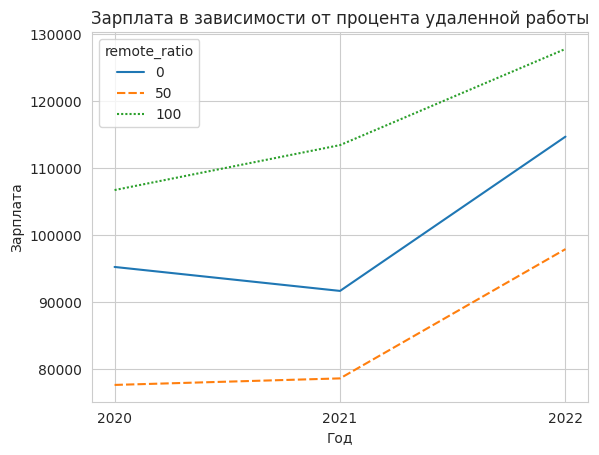

In [21]:
remote_ratio_pivot = data.pivot_table(index='work_year', columns='remote_ratio', values='salary_in_usd')

fig, ax = plt.subplots()
sns.lineplot(remote_ratio_pivot)

ax.set_xlabel('Год')
ax.set_ylabel('Зарплата')
ax.set_title('Зарплата в зависимости от процента удаленной работы')

ax.set_xticks([2020, 2021, 2022])
plt.show()

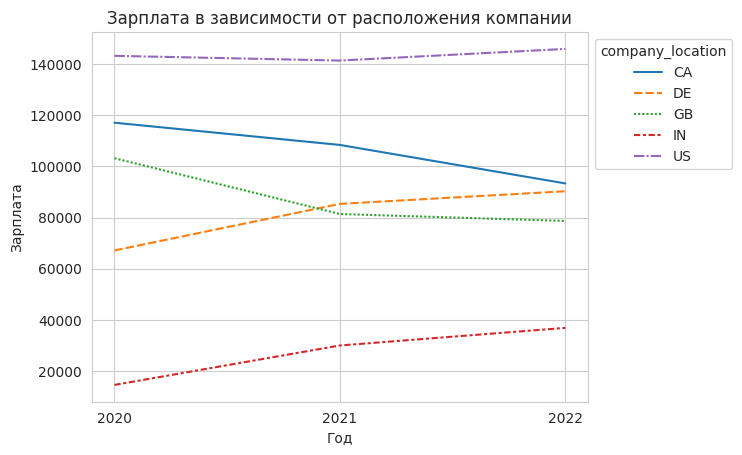

In [22]:
# построение сводной таблицы
company_pivot = data.pivot_table(index='work_year', columns='company_location', values='salary_in_usd')
# создание списка
largest_countries = data.company_location.value_counts().nlargest(5).index.tolist()
for col in company_pivot.columns:
    if col not in largest_countries:
        company_pivot = company_pivot.drop(col, axis=1)

fig, ax = plt.subplots()
sns.lineplot(company_pivot)

ax.set_title('Зарплата в зависимости от расположения компании')
ax.set_xlabel('Год')
ax.set_ylabel('Зарплата')
# перемещение легенды
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.set_xticks([2020, 2021, 2022])
plt.show()

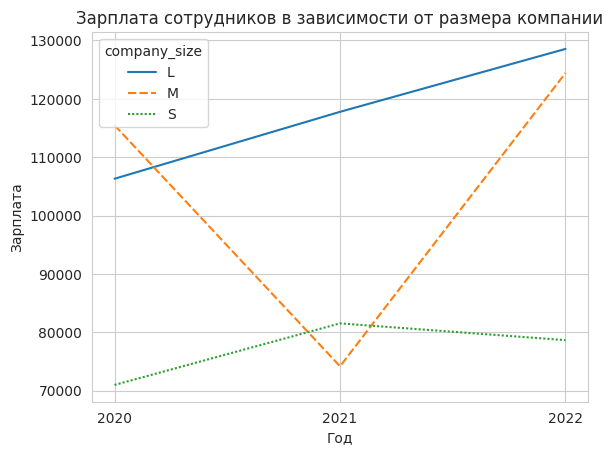

In [23]:
# создание сводной таблицы
company_size_pivot = data.pivot_table(index='work_year', columns='company_size', values='salary_in_usd')

fig, ax = plt.subplots()
sns.lineplot(company_size_pivot)

ax.set_title('Зарплата сотрудников в зависимости от размера компании')
ax.set_xlabel('Год')
ax.set_ylabel('Зарплата')
# перемещение легенды
sns.move_legend(ax, "upper left")

ax.set_xticks([2020, 2021, 2022])
plt.show()

Дата сайентисты и дата инженеры имеют зарплату на одном уровне, в 2021 году она немного упала, но в 2022 году значительно повысилась с 75-80 тысяч до 120-125 тысяч. У дата аналитиков другая ситуация, в 2020 году зарплата была в районе 50 тысяч, но с того времени зарплата стабильно повышалась и теперь средняя зарплата таких специалистов в 2022 году в районе 100 тысяч. В графике с опытом работы линии между собой не пересекаются и идут последовательно. Видно, что зарплата сеньоров повысилась за прошлый год, а зарплата директоров значительно уменьшилась. Те сотрудники, которые живут в Соединенных Штатах или работают в компании, которая там расположена, имеют самую большую зарплату. В странах Европы и компаниях, которые там расположены, сотрудники получают в районе 100 тысяч. В Индии сотрудники не так много зарабатывали, но в 2022 году их зарплата значительно повысилась, и теперь в среднем они зарабатывают в районе 70 тысяч. Можно предположить, что в странах Азии зарплата не такая большая как в Европе или Америке. Больше всего зарабатывают сотрудники, которые работают полностью удаленно, а меньше всего те, кто работает частично удаленно. Возможно это связано с тем, что сотрудники которые работают дома выполняют больше работы, потому-что им не надо тратить время на путь и им просто легче сфокусироваться в домашней обстановке. От размера компании также зависит зарплата. В больших компаниях сотрудники зарабатывают больше всего, а в маленьких соответственно меньше всего. На графике видно резкое понижение средней зарплаты в 2021 для средних компаний, но в 2022 она уже находится на уровне 125 тысяч, что чуть меньше зарплаты больших компаний. Исходя из графиков и всего вышесказанного можно сделать вывод, что безусловно каждый признак очень сильно влияет на зарплату.

## Статистические тесты

In [24]:
# датасет с профессией Data Scientist
data_science_df = data[data.job_title == 'Data Scientist']
# зарплаты дата сайентистов по каждому году
ds_2020 = data_science_df[data_science_df['work_year'] == 2020].salary_in_usd
ds_2021 = data_science_df[data_science_df['work_year'] == 2021].salary_in_usd
ds_2022 = data_science_df[data_science_df['work_year'] == 2022].salary_in_usd
# уровень значимости
alpha = 0.05
# проверка на нормальность
_, p_2020 = stats.shapiro(ds_2020)
_, p_2021 = stats.shapiro(ds_2021)
_, p_2022 = stats.shapiro(ds_2022)
# проверка для 2020 года
print('p-value для 2020 года - %.3f' % (p_2020))
if p_2020 <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

print()

# проверка для 2021 года
print('p-value для 2021 года - %.3f' % (p_2021))
if p_2021 <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

print()

# проверка для 2022 года
print('p-value для 2022 года - %.3f' % (p_2022))
if p_2022 <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value для 2020 года - 0.000
Распределение не нормальное

p-value для 2021 года - 0.107
Распределение нормальное

p-value для 2022 года - 0.676
Распределение нормальное


In [25]:
'''
H0: Распределение зарплаты дата сайентистов за 2021 год меньше или равно распределению зарплаты дата сайентистов за 2020 год.
H1: Распределение зарплаты дата сайентистов за 2021 год больше распределения зарплаты дата сайентистов за 2020 год.
'''
# Использую тест Манна-Уитни, потому что распределение зарплат за 2020 год не является нормально распределенным и выборки не связаны между собой
_, p = stats.mannwhitneyu(ds_2020, ds_2021, alternative='greater')

print('p-value - %.3f' % (p))
if p <= alpha:
    print(f'р-значение меньше, чем заданный уровень значимости {alpha}. Отвергаем нулевую гипотезу')
else:
    print(f'р-значение больше, чем заданный уровень значимости {alpha}. Нет оснований отвергнуть нулевую гипотезу')

p-value - 0.299
р-значение больше, чем заданный уровень значимости 0.05. Нет оснований отвергнуть нулевую гипотезу


Вывод: Нет оснований утверждать, что зарплата дата сайентистов за 2021 год стала больше, чем за 2020.

In [26]:
# проверка равенства дисперсии
result = stats.levene(ds_2021, ds_2022)
p = result[1]
print('p-value - %.3f' % (p))

if p <= alpha:
    print('Дисперсии не одинаковы')
else:
    print('Дисперсии одинаковы')

p-value - 0.264
Дисперсии одинаковы


In [27]:
'''
H0: Средняя зарплата дата сайентистов за 2022 год меньше или равно средней зарплате дата сайентистов за 2021 год.
H1: Средняя зарплата дата сайентистов за 2022 год больше средней зарплаты дата сайентистов за 2021 год.
'''
# Использую двухвыборочный t-критерий, потому что выборки распределенны нормально и не связаны между собой
_, p = stats.ttest_ind(ds_2022, ds_2021, alternative='greater', equal_var=True)

print('p-value - %.3f' % (p))
if p <= alpha:
    print(f'р-значение меньше, чем заданный уровень значимости {alpha}. Отвергаем нулевую гипотезу')
else:
    print(f'р-значение больше, чем заданный уровень значимости {alpha}. Нет оснований отвергнуть нулевую гипотезу')

p-value - 0.000
р-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу


Вывод: Зарплата дата сайентистов увеличилась по сравнению с 2021 годом.

На графике, где сравнивались средние зарплаты трех профессий, видно, что в 2021 году зарплата немного снизилась, что подтвердилось статистическим тестом. Я решил сделать два теста, потому что акцент был именно на ежегодном увеличении зарплаты. В 2022 году зарплата с 70 тысяч повысилась до 130 тысяч, что также подтвердилось статистическим тестом. В выборке очень маленький отрезок времени и поэтому трудно сказать присутсвует ли ежегодный рост зарплат в течении долгого времени или отсутсвует. Но при этом в течении трех последних лет зарплата дата сайентистов действительно выросла. По всему вышесказанному, можно сделать вывод, что в течении трех лет ежегодный рост зарплат отсутствовал, потому что в 2021 зарплата значительно снизилась, но в итоге в 2022 она значительно возросла.

In [28]:
# выборка зарплат дата инженера за 2022 год
de_2022 = data[(data.job_title == 'Data Engineer') & (data.work_year == 2022)].salary_in_usd
# проверка на нормальность
_, p = stats.shapiro(de_2022)

print('p-value - %.3f' % (p))
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value - 0.007
Распределение не нормальное


In [29]:
'''
H0: Распеделение зарплат дата сайентистов и дата инженеров за 2022 год одинаково.
H1: Распределение зарплат дата сайентистов и дата инженеров за 2022 год неодинаково.
'''
# Использую тест Манна-Уитни, потому что распределение зарплат дата инженеров не является нормальным и выборки не связаны между собой
_, p = stats.mannwhitneyu(ds_2022, de_2022)

print('p-value - %.3f' % (p))
if p <= alpha:
    print(f'р-значение меньше, чем заданный уровень значимости {alpha}. Отвергаем нулевую гипотезу')
else:
    print(f'р-значение больше, чем заданный уровень значимости {alpha}. Нет оснований отвергнуть нулевую гипотезу')

p-value - 0.319
р-значение больше, чем заданный уровень значимости 0.05. Нет оснований отвергнуть нулевую гипотезу


Вывод: Нет оснований утверждать, что есть разница в зарплатах дата сайентистов и дата инженеров за 2022 год.
Можно предположить, что это из-за того, что профессии связаны друг с другом. В обоих ролях выполняется работа над данными, над моделями машинного обучения. Можно даже сказать, что эти две профессии дополняют друг друга. Дата сайентист выполняет одну часть работы, а дата инженер другую. Скорее всего, поэтому зарплата у таких специалистов находится на одном уровне.

In [30]:
# зарплаты дата сайентистов в зависимости от размера компаний
ds_s_company = data_science_df[data_science_df.company_size == 'S'].salary_in_usd
ds_m_company = data_science_df[data_science_df.company_size == 'M'].salary_in_usd
ds_l_company = data_science_df[data_science_df.company_size == 'L'].salary_in_usd
# проверка на нормальность
_, p_s = stats.shapiro(ds_s_company)
_, p_m = stats.shapiro(ds_m_company)
_, p_l = stats.shapiro(ds_l_company)
# проверка для маленьких компаний
print('p-value для маленьких компаний - %.3f' % (p_s))
if p_s <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

print()

# проверка для средних компаний
print('p-value для средних компаний - %.3f' % (p_m))
if p_m <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

print()

# проверка для больших компаний
print('p-value для больших компаний - %.3f' % (p_l))
if p_l <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value для маленьких компаний - 0.189
Распределение нормальное

p-value для средних компаний - 0.897
Распределение нормальное

p-value для больших компаний - 0.000
Распределение не нормальное


In [31]:
'''
H0: Медианы зарплат дата сайентистов от размера компании равны.
H1: Медианы зарплат дата сайентистов от размера компании не равны.
'''
# Использую тест Краскела-Уолисса, потому что распределение для больших компаний не является нормальным и выборки не связаны между собой
_, p = stats.kruskal(ds_s_company, ds_m_company, ds_l_company)

print('p-value - %.3f' % (p))
if p <= alpha:
    print(f'р-значение меньше, чем заданный уровень значимости {alpha}. Отвергаем нулевую гипотезу')
else:
    print(f'р-значение больше, чем заданный уровень значимости {alpha}. Нет оснований отвергнуть нулевую гипотезу')

p-value - 0.000
р-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу


Вывод: Зарплаты дата сайентистов, которые работают в компаниях разных размеров отличаются. На графике, где сравниваются зарплаты в зависимости от размера компаний, видно, что чем больше компания, тем больше получает сотрудник Возможно это из-за того, что в больших компаниях требуются более квалифицированные и опытные специалисты для решения сложных и масштабных задач. Также большие компании обладают огромным объемом данных, которые требуют сложного анализа, этот фактор также повышает оплату специалистов.

In [32]:
'''
H0: Связь между наличием должности Data Scientist и Data Engineer и размером компании отсутсвует
H1: Связь между наличием должности Data Scientist и Data Engineer и размером компании присутствует
'''
# датасет с дата сайентистами и дата инженерами
ds_de = data[(data.job_title == 'Data Scientist')|(data.job_title == 'Data Engineer')]
# вычисление таблицы сопряженности
table = pd.crosstab(ds_de.job_title, ds_de.company_size)
# Использую тест хи-квадрат, потому что определяем связь между категориальными признаками
_, p, _, _ = stats.chi2_contingency(table)

print('p-value - %.3f' % (p))
if p <= alpha:
    print(f'р-значение меньше, чем заданный уровень значимости {alpha}. Отвергаем нулевую гипотезу')
else:
    print(f'р-значение больше, чем заданный уровень значимости {alpha}. Нет оснований отвергнуть нулевую гипотезу')

p-value - 0.005
р-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу


Вывод: Связь между наличием должности Data Scientist и Data Engineer и размером компании присутствует. Чем больше компания, тем больше данных, которые надо анализировать и обрабатывать и соответсвенно для это необходимо большее количество специалистов.

In [33]:
# зарплаты дата сайентистов в зависимости от процента удаленной работы
ds_0_remote =  data_science_df[data_science_df.remote_ratio == 0].salary_in_usd
ds_50_remote = data_science_df[data_science_df.remote_ratio == 50].salary_in_usd
ds_100_remote = data_science_df[data_science_df.remote_ratio == 100].salary_in_usd
# проверка на нормальность
_, p_0 = stats.shapiro(ds_0_remote)
_, p_50 = stats.shapiro(ds_50_remote)
_, p_100 = stats.shapiro(ds_100_remote)
# проверка для сотрудников, которые не работают удаленно
print('p-value для сотрудников, которые не работают удаленно - %.3f' % (p_0))
if p_0 <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

print()

# проверка для сотрудников, которые работают частично удаленно
print('p-value для сотрудников, которые работают частично удаленно - %.3f' % (p_50))
if p_50 <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

print()

# проверка для сотрудников, которые работают удаленно
print('p-value для сотрудников, которые работают удаленно - %.3f' % (p_100))
if p_100 <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value для сотрудников, которые не работают удаленно - 0.331
Распределение нормальное

p-value для сотрудников, которые работают частично удаленно - 0.387
Распределение нормальное

p-value для сотрудников, которые работают удаленно - 0.001
Распределение не нормальное


In [34]:
'''
H0: Медианы зарплат дата сайентистов от процента удаленной работы равны
H1: Медианы зарплат дата сайентистов от процента удаленной работы не равны
'''
# Использую тест Краскела-Уолисса, потому что распределение для больших компаний не является нормальным и выборки не связаны между собой
_, p = stats.kruskal(ds_0_remote, ds_50_remote, ds_100_remote)

print('p-value - %.3f' % (p))
if p <= alpha:
    print(f'р-значение меньше, чем заданный уровень значимости {alpha}. Отвергаем нулевую гипотезу')
else:
    print(f'р-значение больше, чем заданный уровень значимости {alpha}. Нет оснований отвергнуть нулевую гипотезу')

p-value - 0.020
р-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу


Вывод: Процент удаленной работы влияет на зарплату дата сайентистов. Скорее всего, это происходит из-за того, что специалисты по разному сфокусированны на работе дома и в офисе. Также офисные работники должны тратить время на дорогу, что тоже может сказаться на их выполняемой работе.

In [35]:
# зарплаты дата аналитиков проживающих в Америке
da_us = data[(data.job_title == 'Data Analyst')&(data.employee_residence == 'US')].salary_in_usd
# проверка на нормальность
_, p = stats.shapiro(da_us)

print('p-value - %.3f' % (p))
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value - 0.529
Распределение нормальное


In [36]:
'''
H0: Средняя зарплата дата аналитиков проживающих в Америке меньше или равна 100 тысячам
H1: Средняя зарплата дата аналитиков проживающих в Америка больше 100 тысяч
'''
# Использую одновыборочный t-критерий, потому что распределение признака является нормальным
_, p = stats.ttest_1samp(da_us, popmean=100_000, alternative='greater')

print('p-value - %.3f' % (p))
if p <= alpha:
    print(f'р-значение меньше, чем заданный уровень значимости {alpha}. Отвергаем нулевую гипотезу')
else:
    print(f'р-значение больше, чем заданный уровень значимости {alpha}. Нет оснований отвергнуть нулевую гипотезу')

p-value - 0.040
р-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу


Вывод: У дата аналитиков проживающих в Америке зарплата больше 100 тысяч. Скорее всего, это из-за того, что в Америке самые большие зарплаты.

По исследованию можно сказать, что каждый признак безусловно влияет на зарплату специалистов. Были удалены неинформативные столбцы, которые не несли особой информации. Также присутствовали построенные графики к каждому признаку, которые показывали как распределение зарплаты и остальных категориальных признаков, так и соотношение зарплат от разных признаков. К заданным вопросам использовались статистические тесты, чтобы построить гипотезы и от них дать ответ на вопрос.